# Visualizations


The purpose of this notebook is to create visualizations for the shrimp data.

In [24]:
#pip install geopandas shapely
#pip install geopandas matplotlib
#pip install contextily
#pip install basemap

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [3]:
#Reading in the dataset
df = pd.read_csv('../../data/SHRIMP_constant_gear.csv')

#df2= pd.read_csv('../../data/SHRIMP_filtered_imputed_zeroes.csv')
                                                        

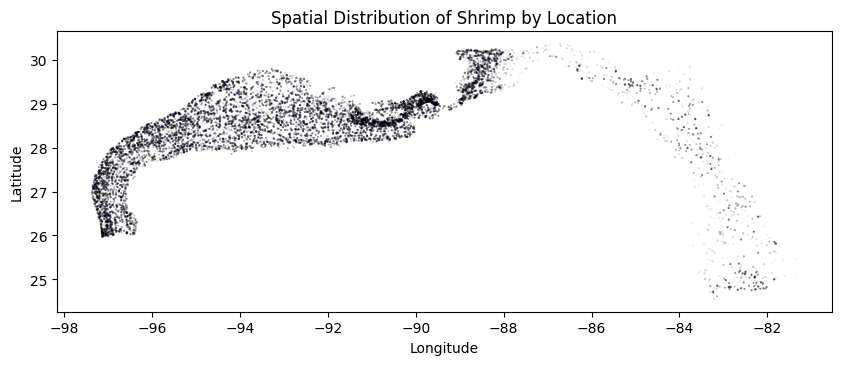

In [8]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['DECSLON'], df['DECSLAT'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame
geo_df.plot(ax=ax, 
            marker='o', 
            color='blue', 
            markersize=geo_df['TOTAL_SHRIMP_WEIGHT'] / 10,  # Adjust the scaling factor as needed
            alpha=0.6,
            edgecolor='k')

# Add labels and titles
plt.title('Spatial Distribution of Shrimp by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


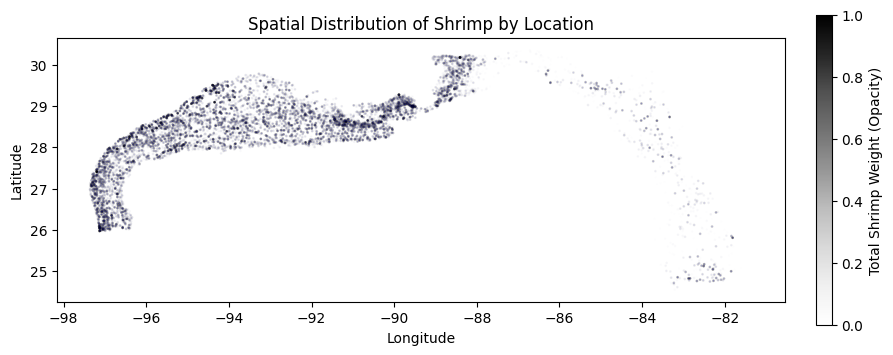

In [9]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['DECSLON'], df['DECSLAT'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Normalize the total_shrimp_weight for opacity (alpha) scaling
norm = plt.Normalize(vmin=geo_df['TOTAL_SHRIMP_WEIGHT'].min(), vmax=geo_df['TOTAL_SHRIMP_WEIGHT'].max())
alpha_values = norm(geo_df['TOTAL_SHRIMP_WEIGHT'])

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame
scatter = geo_df.plot(ax=ax, 
                      marker='o', 
                      color='blue',  # Use a single color for all points
                      markersize=1,  # Set a fixed size for markers
                      alpha=alpha_values,  # Set opacity based on shrimp weight
                      edgecolor='k')  # Add black edge to enhance visibility

# Add labels and titles
plt.title('Spatial Distribution of Shrimp by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a color bar to represent opacity
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)
cbar.set_label('Total Shrimp Weight (Opacity)')

plt.show()



In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


In [7]:
# Convert YEAR and DAYOFYEAR to a single time axis
df['TIME'] = (df['YEAR'] - df['YEAR'].min()) * 365 + df['DAYOFYEAR']


/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17038/4208998236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIME'] = (df2['YEAR'] - df2['YEAR'].min()) * 365 + df2['DAYOFYEAR']


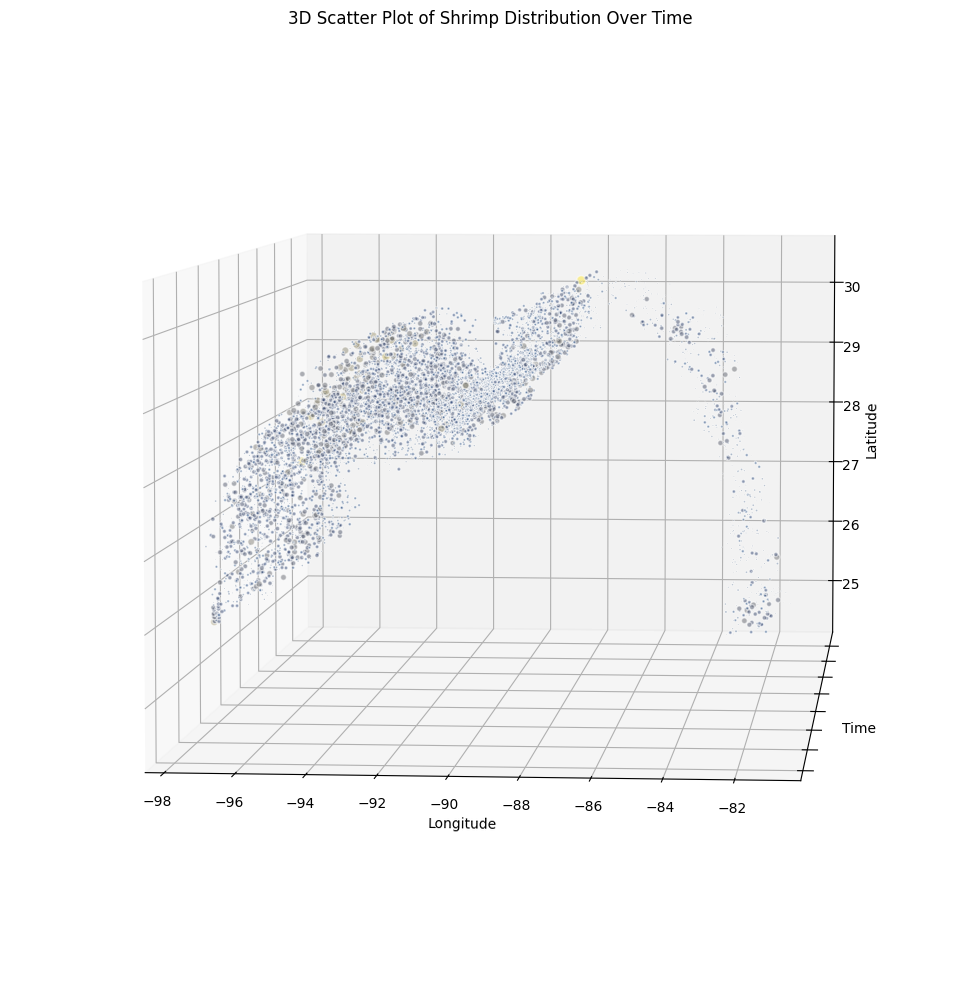

In [12]:


# Drop rows where TOTAL_SHRIMP_WEIGHT is zero
df2 = df[df['TOTAL_SHRIMP_WEIGHT'] > 0]

# Convert YEAR and DAYOFYEAR to a single time axis
df2['TIME'] = (df2['YEAR'] - df2['YEAR'].min()) * 365 + df2['DAYOFYEAR']

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Normalize the total_shrimp_weight for opacity (alpha) scaling
norm = plt.Normalize(vmin=df2['TOTAL_SHRIMP_WEIGHT'].min(), vmax=df2['TOTAL_SHRIMP_WEIGHT'].max())
alpha_values = norm(df2['TOTAL_SHRIMP_WEIGHT'])

# Plot the data
sc = ax.scatter(df2['DECSLON'],  df2['TIME'], df2['DECSLAT'], 
                s=df2['TOTAL_SHRIMP_WEIGHT'] * 3,  # Scale the size of the markers
                c=df2['TOTAL_SHRIMP_WEIGHT'], cmap='cividis', alpha=.5, edgecolors='w')




# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Time')
ax.set_zlabel('Latitude')

#ax.yaxis.set_ticks([])  # Remove the y-axis ticks
ax.yaxis.set_ticklabels([])  # Remove the y-axis labels

# Adjust the aspect ratio to make the y-axis appear deeper
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 2, 1, 1]))

# Adjust the layout to fit everything into the figure
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Adjust the perspective
ax.view_init(elev=5, azim=-85)  # Change these values to alter the view

plt.title('3D Scatter Plot of Shrimp Distribution Over Time')
plt.show()


In [13]:
df2['TOTAL_SHRIMP_WEIGHT'].nlargest(3)

5649    14.491
6774    13.402
6714    11.585
Name: TOTAL_SHRIMP_WEIGHT, dtype: float64

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17038/3815025506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIME'] = (df2['YEAR'] - df2['YEAR'].min()) * 365 + df2['DAYOFYEAR']
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17038/3815025506.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df2['DECSLON'], df2['TIME'], 24, s=df2['TOTAL_SHRIMP_WEIGHT'] * 1.5, cmap='gray', alpha=0.4)
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_17038/3815025506.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.zaxis.set_ticklabels(['',25,26,27,28,29,30])  # Change the y

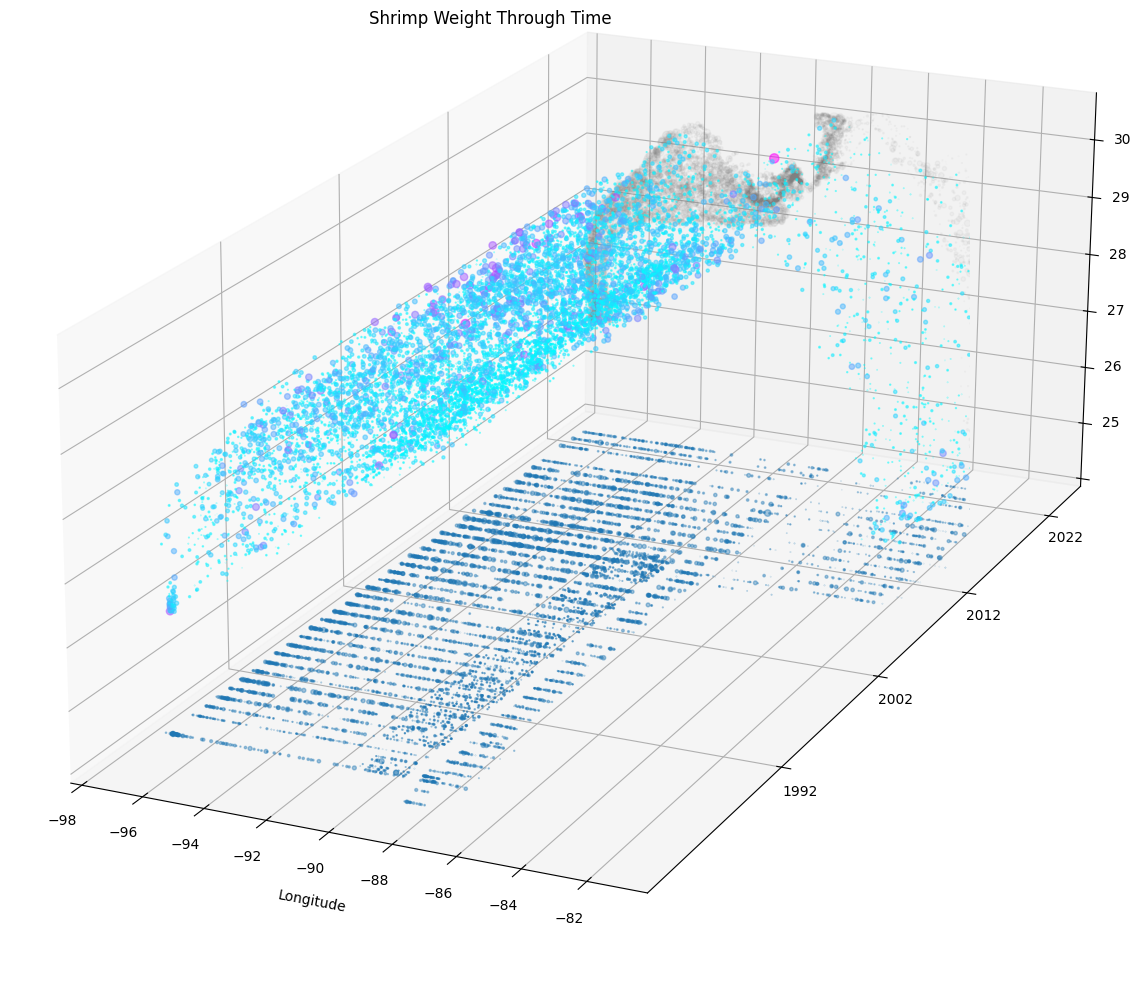

In [14]:


# Drop rows where TOTAL_SHRIMP_WEIGHT is zero
df2 = df[df['TOTAL_SHRIMP_WEIGHT'] > 0]


# Convert YEAR and DAYOFYEAR to a single time axis
df2['TIME'] = (df2['YEAR'] - df2['YEAR'].min()) * 365 + df2['DAYOFYEAR']

df2.dropna(subset=['TIME', 'DECSLAT','DECSLON'])



# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Normalize the total_shrimp_weight for opacity (alpha) scaling
norm = plt.Normalize(vmin=df2['TOTAL_SHRIMP_WEIGHT'].min(), vmax=df2['TOTAL_SHRIMP_WEIGHT'].max())
alpha_values = norm(df2['TOTAL_SHRIMP_WEIGHT'])

# Plot the data
sc = ax.scatter(df2['DECSLON'],  df2['TIME'], df2['DECSLAT'], 
                s=df2['TOTAL_SHRIMP_WEIGHT'] * 3,  # Scale the size of the markers
                c=df2['TOTAL_SHRIMP_WEIGHT'], cmap='cool', alpha=.5)


# Adding shadows on the XZ plane (projecting on the Y=15000 plane)
ax.scatter(df2['DECSLON'], [15000]*len(df2['TIME']), df2['DECSLAT'], s=df2['TOTAL_SHRIMP_WEIGHT'] * 4, c = 'gray', alpha=.05)
#ax.scatter(df2['DECSLON'], [15000]*len(df2['TIME']), df2['DECSLAT'], s=df2['TOTAL_SHRIMP_WEIGHT'] * 4, c = 'gray', alpha=norm(df2['TOTAL_SHRIMP_WEIGHT']))

# Adding shadows on the XY plane (projecting on the Z=24 plane)
ax.scatter(df2['DECSLON'], df2['TIME'], 24, s=df2['TOTAL_SHRIMP_WEIGHT'] * 1.5, cmap='gray', alpha=0.4)



# Adding shadows on the YZ plane (projecting on the X=-98 plane)
#ax.scatter(-98, df2['TIME'], df2['DECSLAT'], s=df2['TOTAL_SHRIMP_WEIGHT'] * 1.5, c='green', alpha=0.2)


# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Year')
ax.set_zlabel('Latitude')

ax.yaxis.set_ticks([3650,7300,10950,14600])  # Change the y-axis ticks
ax.yaxis.set_ticklabels([1992,2002,2012,2022])  # Change the y-axis labels


ax.zaxis.set_ticklabels(['',25,26,27,28,29,30])  # Change the y-axis labels

# Reposition the y-axis label by adjusting the labelpad
ax.yaxis.labelpad = 200  # Increase or decrease this value to move the label

# Adjust the aspect ratio to make the y-axis appear deeper
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 2, 1, 1]))

ax.set_zlim(24, ax.get_zlim()[1])  # Set the lower limit of the z-axis to 24
ax.set_xlim(-98, ax.get_xlim()[1])  # Set the lower limit of the x-axis to -98

# Adjust the layout to fit everything into the figure
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


# Adjust the perspective
ax.view_init(elev=20, azim=-65)  # Change these values to alter the view

plt.title('Shrimp Weight Through Time')
plt.show()


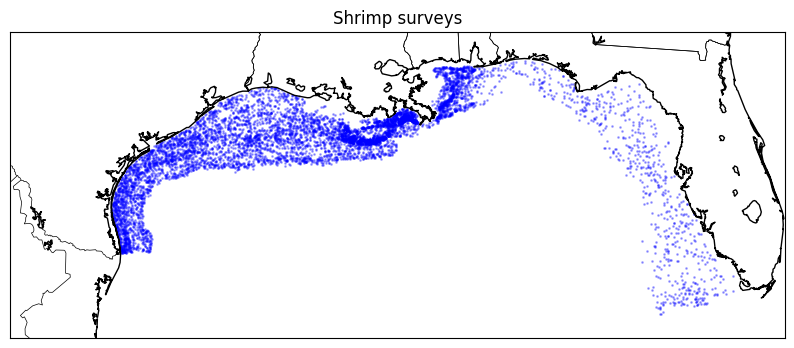

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Sample Data (Replace this with your actual data)
lats = df['DECSLAT']
lons = df['DECSLON']

# Create a Basemap instance centered around your data
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', 
            llcrnrlat=24, urcrnrlat=31,  # lower and upper latitude
            llcrnrlon=-100, urcrnrlon=-80,  # lower and upper longitude
            resolution='i')

# Draw coastlines, countries, etc.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert lat/lon to map projection coordinates
x, y = m(lons, lats)

# Normalize the total_shrimp_weight for opacity (alpha) scaling
norm = plt.Normalize(vmin=df['TOTAL_SHRIMP_WEIGHT'].min(), vmax=df['TOTAL_SHRIMP_WEIGHT'].max())
alpha_values = norm(df['TOTAL_SHRIMP_WEIGHT'])

# Plot the data on the map
m.scatter(x, y, c='blue', s = 1, marker='o', alpha=.3)

# Add a title
plt.title('Shrimp surveys')

# Show the plot
plt.show()


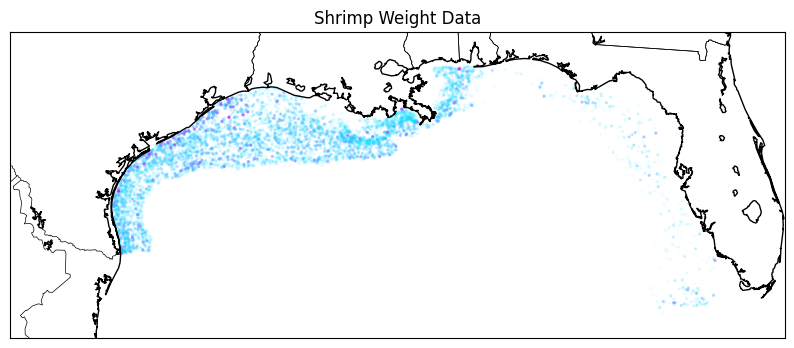

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Sample Data (Replace this with your actual data)
lats = df['DECSLAT']
lons = df['DECSLON']

# Create a Basemap instance centered around your data
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', 
            llcrnrlat=24, urcrnrlat=31,  # lower and upper latitude
            llcrnrlon=-100, urcrnrlon=-80,  # lower and upper longitude
            resolution='i')

# Draw coastlines, countries, etc.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert lat/lon to map projection coordinates
x, y = m(lons, lats)

# Normalize the total_shrimp_weight for opacity (alpha) scaling
norm = plt.Normalize(vmin=df['TOTAL_SHRIMP_WEIGHT'].min(), vmax=df['TOTAL_SHRIMP_WEIGHT'].max())
alpha_values = norm(df['TOTAL_SHRIMP_WEIGHT'])

# Plot the data on the map
m.scatter(x, y, cmap = 'cool', s = 2, marker='o', c = norm(df['TOTAL_SHRIMP_WEIGHT']),alpha = norm(df['TOTAL_SHRIMP_WEIGHT']))

# Add a title
plt.title('Shrimp Weight Data')

# Show the plot
plt.show()
